In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

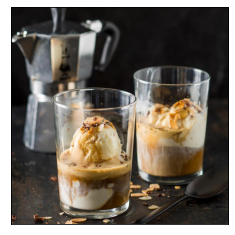

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Комп. зрение/affogato.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])
plt.show()

1.  ORB-features точки на изображении:

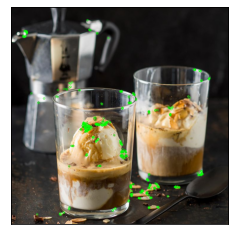

In [ ]:
orb = cv2.ORB_create()
kp = orb.detect(rgb_img, None)
img2 = cv2.drawKeypoints(rgb_img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.xticks([]), plt.yticks([])
plt.show()

2. Sift-features точки на изображении:

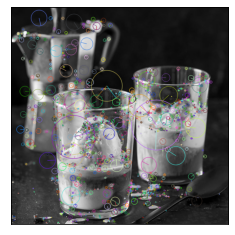

In [ ]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
sift_img=cv2.drawKeypoints(gray,kp,rgb_img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)
plt.xticks([]), plt.yticks([])
plt.show()

3. Canny edges на изображенни:

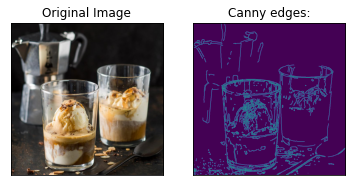

In [ ]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img, 100, 200)
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges)
plt.title('Canny edges:')
plt.xticks([]), plt.yticks([])
plt.show()

4, 5: GRAYSCALE и HSV:

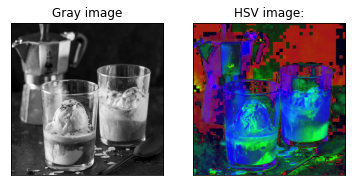

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.subplot(121)
plt.imshow(gray_img, cmap = 'gray')
plt.title('Gray image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(hsv_img)
plt.title('HSV image:')
plt.xticks([]), plt.yticks([])
plt.show()

6, 7: Отзеркаливание по правой, по нижней границе:

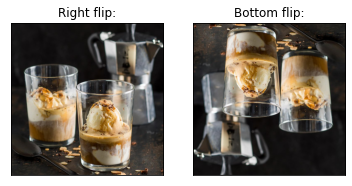

In [ ]:
rflip_img = cv2.flip(rgb_img, 1)
bflip_img = cv2.flip(rgb_img, 0)
plt.subplot(121)
plt.imshow(rflip_img)
plt.title('Right flip:')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(bflip_img)
plt.title('Bottom flip:')
plt.xticks([]), plt.yticks([])
plt.show()

8.  Поворот изображения на 45 градусов:
9.  Поворот изображения на 30 градусов вокруг заданной точки:

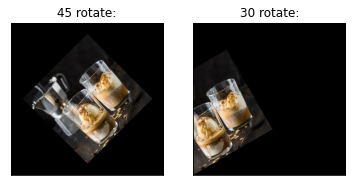

In [ ]:
(h, w) = img.shape[:2]
center = (int(w / 2), int(h / 2))
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 0.6)
img_45 = cv2.warpAffine(rgb_img, rotation_matrix, (w, h))
plt.subplot(121)
plt.imshow(img_45)
plt.title('45 rotate:')
plt.xticks([]), plt.yticks([])
(h, w) = img.shape[:2]
point = (0, h)
rotation_matrix = cv2.getRotationMatrix2D(point, 30, 0.6)
img_30 = cv2.warpAffine(rgb_img, rotation_matrix, (w, h))
plt.subplot(122)
plt.imshow(img_30)
plt.title('30 rotate:')
plt.xticks([]), plt.yticks([])
plt.show()

10. Cмещение изображение но 10 пикселей вправо:

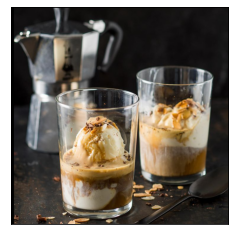

In [ ]:
shift = np.array( [[1, 0, 10], [0, 1, 0]] ).astype(np.float32)
shift_img = cv2.warpAffine(rgb_img, shift, dsize=(img.shape[1],img.shape[0]))
plt.imshow(shift_img)
plt.xticks([]), plt.yticks([])
plt.show()


11. Изменение яркости:

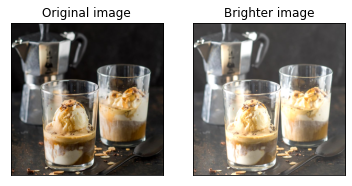

In [ ]:
bri_image = cv2.convertScaleAbs(rgb_img, beta=50)
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(bri_image)
plt.title('Brighter image')
plt.xticks([]), plt.yticks([])
plt.show()

12. Изменение контраста:

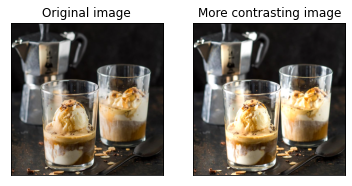

In [ ]:
cont_image = cv2.convertScaleAbs(rgb_img, alpha=1.2)
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cont_image)
plt.title('More contrasting image')
plt.xticks([]), plt.yticks([])
plt.show()

13. Гамма - преобразование:

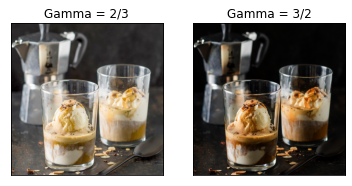

In [ ]:
g1_img = np.power(rgb_img/float(np.max(rgb_img)), 1/1.5)
g2_img2 = np.power(rgb_img/float(np.max(rgb_img)), 1.5)
plt.subplot(121)
plt.imshow(g1_img)
plt.title('Gamma = 2/3')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(g2_img2)
plt.title('Gamma = 3/2')
plt.xticks([]), plt.yticks([])
plt.show()

14. Гистограммная эквализация

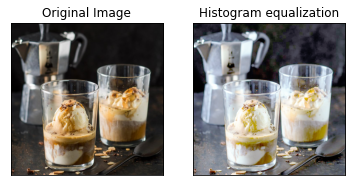

In [ ]:
r, g, b = cv2.split(rgb_img)
new_r = cv2.equalizeHist(r)
new_g = cv2.equalizeHist(g)
new_b = cv2.equalizeHist(b)
eq_gist_img = cv2.merge([new_r, new_g, new_b])
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(eq_gist_img)
plt.title('Histogram equalization')
plt.xticks([]), plt.yticks([])
plt.show()

15, 16. Баланс белого:

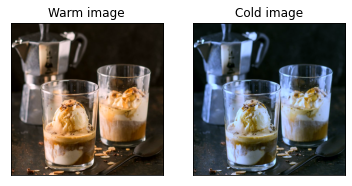

In [ ]:
r, g, b = cv2.split(rgb_img)
r_avg = cv2.mean(r)[0]
g_avg = cv2.mean(g)[0]
b_avg = cv2.mean(b)[0]
k = (r_avg + g_avg + b_avg) / 3
kr = k / r_avg
kg = k / g_avg
kb = k / b_avg 
r = cv2.addWeighted(src1=r, alpha= kr*1.2 , src2=0, beta=0, gamma=3)
g = cv2.addWeighted(src1=g, alpha=kg, src2=0, beta=0, gamma=0)
b = cv2.addWeighted(src1=b, alpha=kb*0.9, src2=0, beta=0, gamma=-10)
warm_img = cv2.merge([r, g, b])
r = cv2.addWeighted(src1=r, alpha= kr*0.9 , src2=0, beta=0, gamma=-10)
g = cv2.addWeighted(src1=g, alpha=kg, src2=0, beta=0, gamma=0)
b = cv2.addWeighted(src1=b, alpha=kb*1.2, src2=0, beta=0, gamma=3)
cold_img = cv2.merge([r, g, b])


plt.subplot(121)
plt.imshow(warm_img)
plt.title('Warm image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cold_img)
plt.title('Cold image')
plt.xticks([]), plt.yticks([])
plt.show()

17. Изменение цветовой палитры по заданному шаблону:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


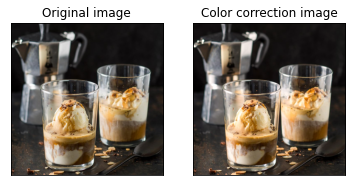

In [ ]:
template_color = [234,226,222] #молочный цвет
sourse_color = [215,203,172] #молочный цвет на моей картинке 
r, g, b = cv2.split(rgb_img)
r = (r*(template_color[0]/sourse_color[0])).astype(int);
g = (g*(template_color[1]/sourse_color[0])).astype(int);
b = (b*(template_color[2]/sourse_color[0])).astype(int);
colorcorr_img = cv2.merge([r, g, b])
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(colorcorr_img)
plt.title('Сolor correction image')
plt.xticks([]), plt.yticks([])
plt.show()

18. Бинаризация:

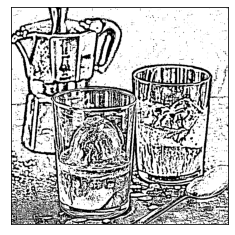

In [ ]:
bin_img = cv2.adaptiveThreshold(gray_img, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(bin_img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()

19. Контуры на бинаризированном изображении:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


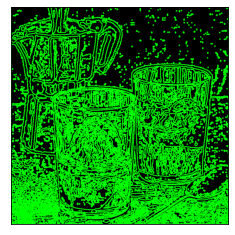

In [ ]:
inp_img, contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(img.shape)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)
plt.imshow(img_contours)
plt.xticks([]), plt.yticks([])
plt.show()

20. Фильтр Собеля для поиска границ:

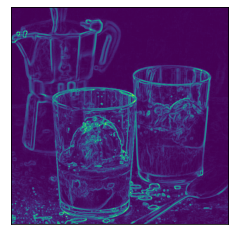

In [ ]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(gray_img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray_img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.imshow(grad)
plt.xticks([]), plt.yticks([])
plt.show()

21. Размытие изображения:

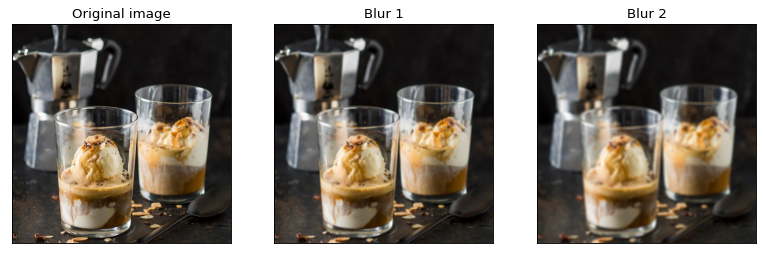

In [ ]:
blur1_img = cv2.blur(rgb_img, (5, 5))
blur2_img = cv2.blur(rgb_img, (10, 10))
plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(131)
plt.imshow(rgb_img)
plt.title('Original image')
plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(blur1_img)
plt.title('Blur 1')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(blur2_img)
plt.title('Blur 2')
plt.xticks([]), plt.yticks([])
plt.show()

22, 23. Преобразование Фурье:

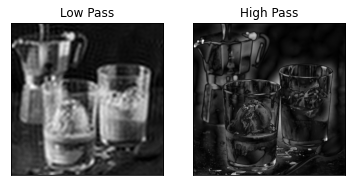

In [ ]:
dft = cv2.dft(np.float32(gray_img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = gray_img.shape
crow,ccol = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask1 = np.zeros((rows,cols,2),np.uint8)
mask1[crow-30:crow+30, ccol-30:ccol+30] = 1

mask2 = np.ones((rows,cols,2),np.uint8)
mask2[crow-5:crow+5, ccol-5:ccol+5] = 0

# apply mask and inverse DFT
fshift1 = dft_shift*mask1
f_ishift1 = np.fft.ifftshift(fshift1)
img_back1 = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

fshift2 = dft_shift*mask2
f_ishift2 = np.fft.ifftshift(fshift2)
img_back2 = cv2.idft(f_ishift2)
img_back2 = cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1])

plt.subplot(121),plt.imshow(img_back1, cmap = 'gray')
plt.title('Low Pass'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back2, cmap = 'gray')
plt.title('High Pass'), plt.xticks([]), plt.yticks([])
plt.show()

24, 25. Эрозия и дилатация:

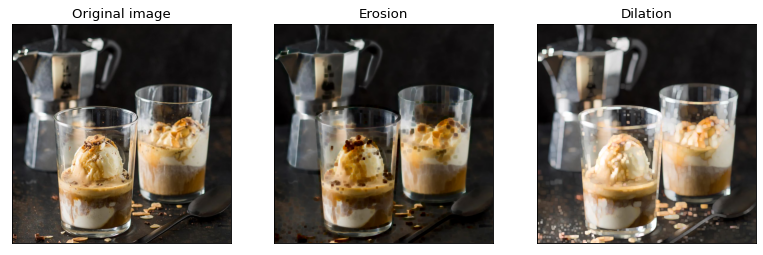

In [ ]:
filter = np.ones((7,7), np.uint8)
img_erosion = cv2.erode(rgb_img, filter, iterations=1)
img_dilation = cv2.dilate(rgb_img, filter, iterations=1)
plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(131)
plt.imshow(rgb_img)
plt.title('Original image')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_erosion)
plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_dilation)
plt.title('Dilation')
plt.xticks([]), plt.yticks([])
plt.show()